In [1]:
import tensorflow as tf
import numpy as np
data = np.load("/content/drive/MyDrive/RNN/all_music.npy")

In [3]:
inp = tf.keras.layers.Input((12,3000))
x = tf.keras.layers.GRU(1500,return_sequences=True)(inp)
x = tf.reshape(x,[-1,12*1500])
x = tf.keras.layers.Dense(12*1000,activation="relu",kernel_regularizer=tf.keras.regularizers.l1(0.))(x)
x = tf.keras.layers.BatchNormalization()(x)
t = tf.keras.layers.Dense(12*500)(x)
x = tf.reshape(t,[-1,12,500])
o = tf.keras.layers.GRU(3000,activation="sigmoid",return_sequences=True)(x)
model = tf.keras.Model(inputs=inp,outputs=[o])

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12, 3000)]        0         
_________________________________________________________________
gru (GRU)                    (None, 12, 1500)          20259000  
_________________________________________________________________
tf.reshape (TFOpLambda)      (None, 18000)             0         
_________________________________________________________________
dense (Dense)                (None, 12000)             216012000 
_________________________________________________________________
batch_normalization (BatchNo (None, 12000)             48000     
_________________________________________________________________
dense_1 (Dense)              (None, 6000)              72006000  
_________________________________________________________________
tf.reshape_1 (TFOpLambda)    (None, 12, 500)           0     

In [5]:
model(np.random.normal(size=(1,12,3000)),training=False)

<tf.Tensor: shape=(1, 12, 3000), dtype=float32, numpy=
array([[[0.2608618 , 0.25716382, 0.27387434, ..., 0.27228734,
         0.23935133, 0.25217322],
        [0.39450774, 0.3619628 , 0.38169283, ..., 0.36300075,
         0.3425836 , 0.42486596],
        [0.44523203, 0.3959991 , 0.45466828, ..., 0.42177922,
         0.38843524, 0.4318785 ],
        ...,
        [0.5189752 , 0.44380778, 0.51961446, ..., 0.43910432,
         0.45577973, 0.4527149 ],
        [0.5158825 , 0.45786148, 0.5363594 , ..., 0.43406892,
         0.44803214, 0.46650225],
        [0.52314585, 0.43938255, 0.5373303 , ..., 0.45658356,
         0.43935466, 0.46584707]]], dtype=float32)>

In [8]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
                loss=tf.losses.BinaryCrossentropy())
model.fit(x=data,y=data,batch_size=250,epochs=1000,verbose=1)

Epoch 1/1000
10/10 [==============================] - 8s 491ms/step - loss: 0.5142
Epoch 2/1000
10/10 [==============================] - 5s 502ms/step - loss: 0.5136
Epoch 3/1000
10/10 [==============================] - 5s 508ms/step - loss: 0.5114
Epoch 4/1000
10/10 [==============================] - 5s 519ms/step - loss: 0.5045
Epoch 5/1000
10/10 [==============================] - 5s 526ms/step - loss: 0.5073
Epoch 6/1000
 8/10 [=======================>......] - ETA: 1s - loss: 0.5047

KeyboardInterrupt: ignored

In [11]:
model.save_weights("new.h5")

In [9]:
i = 0
((model(data[i:i+1],training=False).numpy() - data[i:i+1])**2).mean()

0.11323879155715671

In [10]:
np.sum(abs(model(data[i:i+1],training=False).numpy() - data[i:i+1]))/12/3000

0.28636287699523383

In [26]:
import matplotlib.pyplot as plt

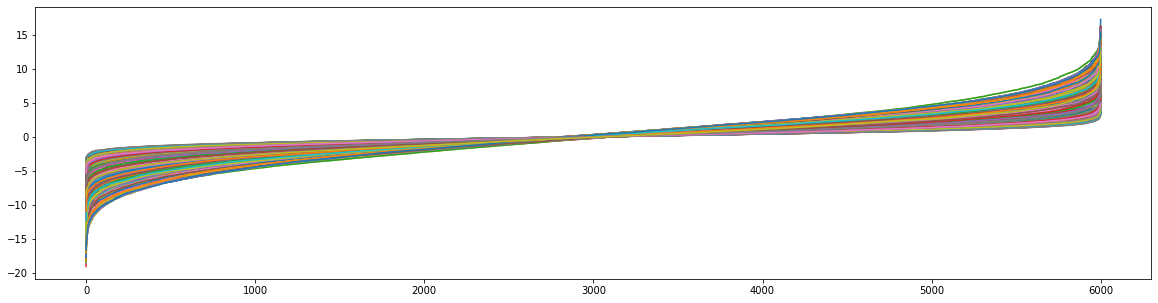

In [27]:
plt.figure(figsize=(20,5))
for i in range(out_data.shape[0]):
  plt.plot(sorted(out_data[i].tolist()))
plt.show()

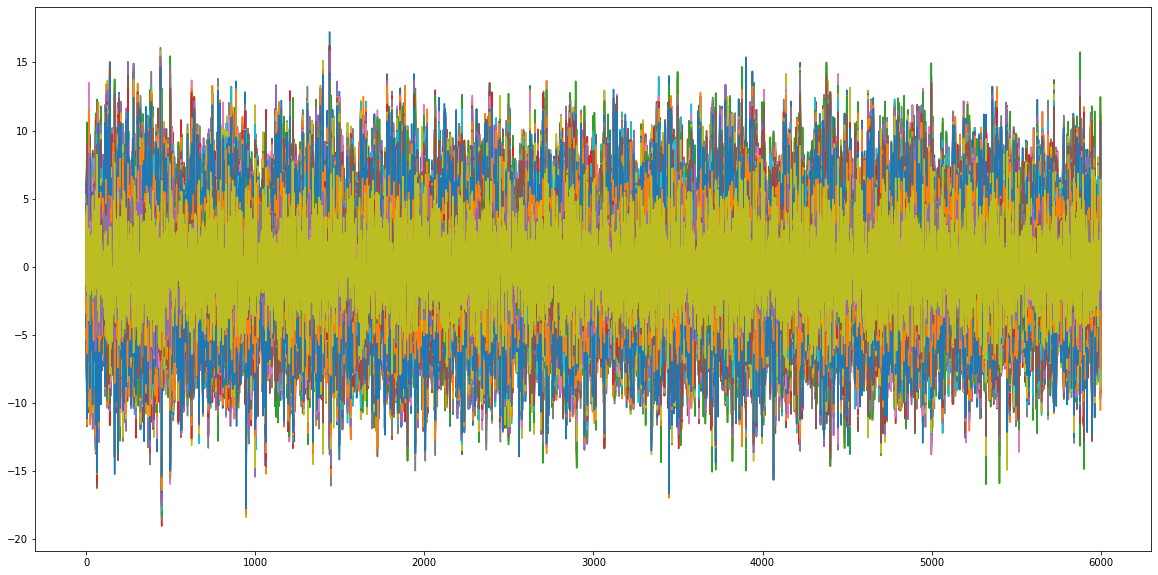

In [31]:
plt.figure(figsize=(20,10))
for i in range(out_data.shape[0]):
  plt.plot(out_data[i])
plt.show()

In [36]:
from sklearn.cluster import DBSCAN
import numpy as np
out_data = np.load("music_AE.npy")
clustering = DBSCAN(eps=100, min_samples=2).fit(out_data)
print("總類:",max(clustering.labels_))
print("分類失敗數:",clustering.labels_.tolist().count(-1))

3


In [41]:
tmp = out_data[0]
def find_nearest(main_data,all_data):
  dist_list = []
  for i in range(all_data.shape[0]):
    dist_list.append(np.sum(abs(all_data[i] - main_data)))
  arange_list = np.arange(0,all_data.shape[0],1).tolist()
  dist_list, arange_list = zip(*sorted(zip(dist_list, arange_list)))
  return dist_list, arange_list

In [43]:
d,a = find_nearest(tmp,out_data)

In [51]:
a[1]

20